In [1]:
!pip install pyarrow

  Using cached pyarrow-18.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-18.1.0-cp311-cp311-manylinux_2_28_x86_64.whl (40.1 MB)


In [2]:
!pip install fastparquet

  Using cached fastparquet-2024.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
Using cached fastparquet-2024.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


In [3]:
!pip install transformers


  Using cached transformers-4.47.0-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.26.5-py3-none-any.whl.metadata (13 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached transformers-4.47.0-py3-none-any.whl (10.1 MB)
Using cached huggingface_hub-0.26.5-py3-none-any.whl (447 kB)
Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (792 kB)
Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
Using cached tokenizers-0.21.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
file_path = "stem_keyword_df4"
df_lemm = pd.read_parquet(file_path)

In [6]:
df_lemm.shape

(45915463, 9)

In [7]:
df_lemm.head()

,keyword,user_id,device_id,product_id,event,event_timestamp,event_date,platform,lemma_keywords
0,remington одежда,,c2fa705c-1453-4114-b02d-44546dd03f88,100068822100,listing_products_view,2024-11-15 10:42:08.995153200+03:00,2024-11-15,iOS,remington одежда
1,remington одежда,,c2fa705c-1453-4114-b02d-44546dd03f88,100068822100,listing_products_view,2024-11-15 10:42:48.993401115+03:00,2024-11-15,iOS,remington одежда
2,remington одежда,,c2fa705c-1453-4114-b02d-44546dd03f88,100068822100,listing_products_view,2024-11-15 10:42:53.970433544+03:00,2024-11-15,iOS,remington одежда
3,armytek,cjsnl3mf2jg5nj2b09g0,3263eefe-016a-405d-bebf-f014528010eb,100068822115,listing_products_view,2024-11-15 19:19:52.380778246+03:00,2024-11-15,iOS,armytek
4,armytek фонарь,cnd51vmf2jgdmh2je7pg,a85a1611-0168-4203-a274-9c1203aef849,100068822115,listing_products_view,2024-11-15 20:18:34.252203800+03:00,2024-11-15,iOS,armytek фонарь


In [8]:
from tqdm.auto import tqdm
tqdm.pandas()

In [9]:
df_lemm['sorted_keywords'] = [' '.join(sorted(query.split())) for query in tqdm(df_lemm['lemma_keywords'], desc="Processing queries")]


Processing queries:   0%|          | 0/45915463 [00:00<?, ?it/s]

In [10]:
df_lemm[['lemma_keywords', 'sorted_keywords']][:20]

,lemma_keywords,sorted_keywords
0,remington одежда,remington одежда
1,remington одежда,remington одежда
2,remington одежда,remington одежда
3,armytek,armytek
4,armytek фонарь,armytek фонарь
5,чехол для ружьё,для ружьё чехол
6,чехол для ружьё,для ружьё чехол
7,чехол для ружьё,для ружьё чехол
8,чехол для ружьё,для ружьё чехол
9,чехол для ружьё,для ружьё чехол


In [11]:
keyword_counts = df_lemm['sorted_keywords'].value_counts().reset_index()
keyword_counts

,sorted_keywords,count
0,машина стиральный,209488
1,телевизор,164980
2,смартфон,158136
3,kuchenland,154305
4,чайник электрический,149850
...,...,...
378112,merrel зимний кроссовок мужской,1
378113,f-t83505,1
378114,2s air dji аккамулятор,1
378115,600013994957,1


In [12]:
keyword_counts.columns = ['sorted_keywords', 'frequency']
keyword_counts

,sorted_keywords,frequency
0,машина стиральный,209488
1,телевизор,164980
2,смартфон,158136
3,kuchenland,154305
4,чайник электрический,149850
...,...,...
378112,merrel зимний кроссовок мужской,1
378113,f-t83505,1
378114,2s air dji аккамулятор,1
378115,600013994957,1


In [13]:
low_freq_threshold = keyword_counts['frequency'].quantile(0.02)
# print(low_freq_threshold)
low_freq_keywords = keyword_counts[keyword_counts['frequency'] <= low_freq_threshold]

print(f"Количество низкочастотных запросов: {len(low_freq_keywords)}")

Количество низкочастотных запросов: 11554


In [14]:
low_freq_keywords[:20]

,sorted_keywords,frequency
366563,10050fe hhy hyundai бензиновый генератор,1
366564,100042536578,1
366565,гринч маска,1
366566,", , , 32 81 hd sber sdx-32h2128 smart tv смотр...",1
366567,металлидти,1
366568,металлидти сольфеджио,1
366569,zofft фен-стайлер,1
366570,гельтечь пилинг сыворотка,1
366571,dell g2524h монитор,1
366572,диван кровать оскар,1


In [15]:
pattern = r"\b\d{12}\b"

# Удаляем строки, где в lemma_keywords есть артикулы
low_freq_keywords = low_freq_keywords[~low_freq_keywords['sorted_keywords'].str.contains(pattern, na=False)]
# 100042536578


In [16]:
low_freq_keywords[:20]

,sorted_keywords,frequency
366563,10050fe hhy hyundai бензиновый генератор,1
366565,гринч маска,1
366566,", , , 32 81 hd sber sdx-32h2128 smart tv смотр...",1
366567,металлидти,1
366568,металлидти сольфеджио,1
366569,zofft фен-стайлер,1
366570,гельтечь пилинг сыворотка,1
366571,dell g2524h монитор,1
366572,диван кровать оскар,1
366573,ra-kv0402s,1


In [17]:
low_freq_keywords.shape

(10631, 2)

# Векторизация с помощью BERT

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
model_name = "bert-base-multilingual-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [22]:
keywords = low_freq_keywords["sorted_keywords"].tolist()

encoded_input = tokenizer(
    keywords, 
    padding=True,           
    truncation=True,         
    max_length=128,          
    return_tensors="pt"     
)

with torch.no_grad():  # Выключаем градиенты, т.к. нам не нужно обучение
    model_output = model(**encoded_input)

embeddings = model_output.last_hidden_state

keyword_embeddings = embeddings.mean(dim=1)

print("Эмбеддинги для каждого текста:")
print(keyword_embeddings)

Эмбеддинги для каждого текста:
tensor([[ 0.0195,  0.2272,  0.3918,  ...,  0.1196,  0.1758, -0.4334],
        [ 0.0265,  0.1609,  0.1455,  ...,  0.0042,  0.1332, -0.3106],
        [-0.2508, -0.1178,  0.2450,  ..., -0.1461,  0.2265, -0.2885],
        ...,
        [ 0.0151, -0.0322,  0.3000,  ..., -0.1147,  0.0221, -0.3305],
        [-0.0747,  0.1636,  0.2191,  ...,  0.0728,  0.3410, -0.2647],
        [ 0.0259, -0.1410,  0.2165,  ..., -0.0288,  0.3841, -0.3336]])


In [23]:
keyword_embeddings.shape

torch.Size([10631, 768])

In [24]:
X = keyword_embeddings.numpy()

## Elbow method

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

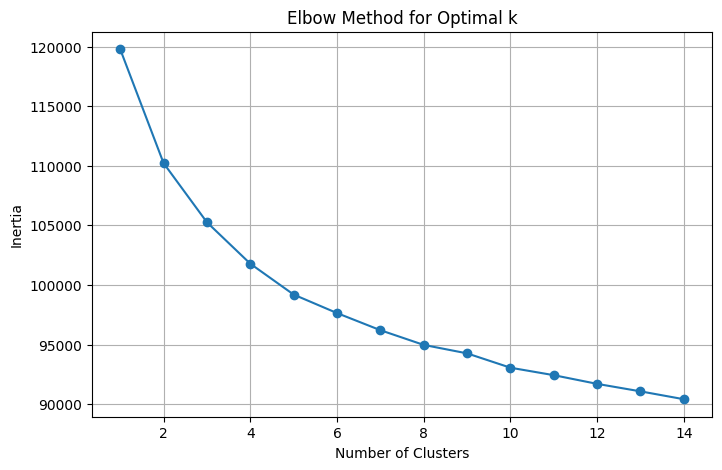

In [29]:
inertia = []
K = range(1, 15) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

=> колво кластеров = 5

## Silhouette Method (очень долго грузится)

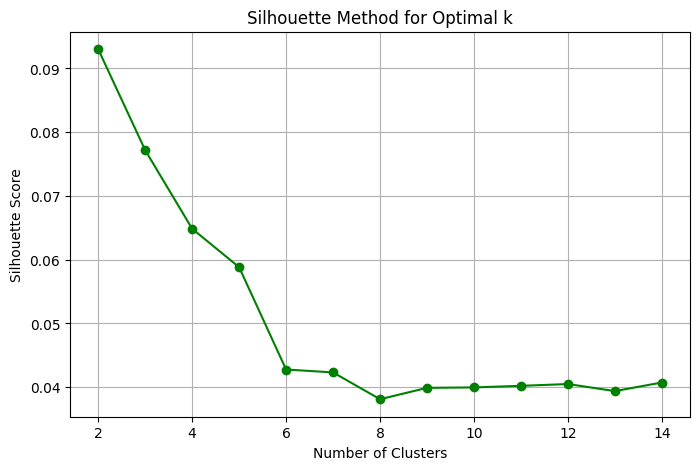

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 15) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

=> колво кластеров = 2

# Кластеризация методом K-means

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [32]:
from sklearn.cluster import KMeans
import pandas as pd

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

In [33]:
low_freq_keywords.loc[:, "cluster"] = cluster_labels

print("Данные с метками кластеров:")
print(low_freq_keywords)

# сохранить:
# low_freq_keywords.to_csv("keywords_with_clusters.csv", index=False)

Данные с метками кластеров:
                                          sorted_keywords  frequency  cluster
366563           10050fe hhy hyundai бензиновый генератор          1        0
366565                                        гринч маска          1        2
366566  , , , 32 81 hd sber sdx-32h2128 smart tv смотр...          1        0
366567                                         металлидти          1        2
366568                              металлидти сольфеджио          1        2
...                                                   ...        ...      ...
378110                               garlyn соковыжималка          1        1
378111                                    360 insta link2          1        4
378112                    merrel зимний кроссовок мужской          1        1
378113                                           f-t83505          1        4
378114                             2s air dji аккамулятор          1        0

[10631 rows x 3 columns]


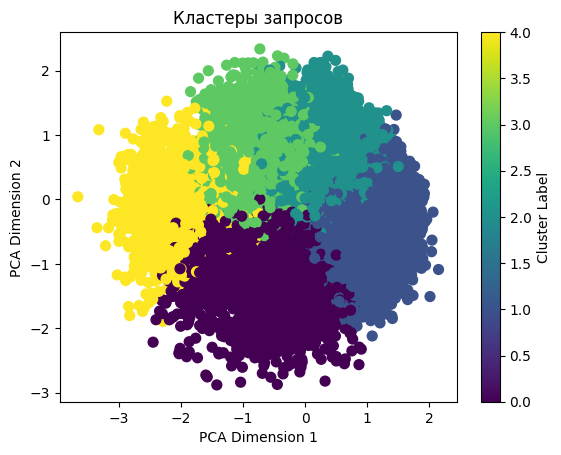

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2D для визуализации
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(X)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap="viridis", s=50)
plt.colorbar(label="Cluster Label")
plt.title("Кластеры запросов")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

In [35]:
cluster_counts = low_freq_keywords['cluster'].value_counts()
print(cluster_counts)

cluster
1    3415
2    2525
3    1896
0    1801
4     994
Name: count, dtype: int64


# Нахождение тем кластеров

## 1. Примеры запросов из каждого кластера, чтобы понять их общую тему:

In [37]:
for cluster_id in low_freq_keywords['cluster'].unique():
    print(f"\nКластер {cluster_id}:")
    cluster_keywords = low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['sorted_keywords']
    print(cluster_keywords.sample(10))  # Примеры запросов


Кластер 0:
367858                 compact k7 karcher пеногеннратор
374233    1970 dx frost full inverter no weissgauff wrk
368940                         1700 xpb клиновый ремень
369912                         1 18v all cat dg250b for
372099                                t4 wando проектор
377994                                 2 hdd на хранить
374485                   a8972pl-4cc arte lamp led спот
370730                      из набор пистолет стендофф2
370561                          170c таблетка термостат
375743                      lego minecraft лисий хижина
Name: sorted_keywords, dtype: object

Кластер 2:
374389                                       vester рубашка
368083                                                вощин
371180                                  наташка первоклашка
366797                                 барри джеймс миранда
372660           dedica delonghi ec685.m кофеварка рожковый
369379    , 2ач 434.2.2.20 да-12эр дрель-шуруповерт инте...
375238             

## 2. Частотный анализ слов в каждом кластере

In [38]:
from collections import Counter

def get_top_words(texts, n=5):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

for cluster in low_freq_keywords["cluster"].unique():
    cluster_keywords = low_freq_keywords[low_freq_keywords["cluster"] == cluster]["sorted_keywords"]
    top_words = get_top_words(cluster_keywords, n=20)  # Топ-5 слов
    print(f"Кластер {cluster}:")
    print(", ".join([word for word, count in top_words]))
    print()

Кластер 0:
,, для, (, ), pro, с, xiaomi, пылесос, машина, samsung, чёрный, белый, телевизор, ноутбук, plus, 2, на, смотреть, 3, gaming

Кластер 2:
на, с, крем, книга, 3, для, конфета, детский, телевизор, чехол, куртка, и, kuchenland, кружка, 2, сумка, гель, маска, игра, стол

Кластер 1:
для, с, ,, на, в, набор, и, женский, мужской, волос, ., книга, крем, 1, кг, смотреть, белый, из, детский, зимний

Кластер 4:
lego, lg, msi, philips, zein, makita, tefal, (, tcl, polaris, ), gorenje, dexp, hisense, logitech, midea, haier, ,, pro, 2024

Кластер 3:
pro, the, 2, 3, xbox, s, plus, skin, black, huawei, 13, white, la, 4, watch, one, 5, 100, 10, of



## 3. LDA модели для нахождения темы документа

In [39]:
!pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.0.5-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.0.5-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [40]:
from gensim import corpora
from gensim.models import LdaModel

cluster_texts = low_freq_keywords.groupby("cluster")["sorted_keywords"].apply(list)
for cluster, texts in cluster_texts.items():
    tokenized_texts = [text.split() for text in texts]

    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, random_state=42)

    print(f"Кластер {cluster}:")
    for idx, topic in lda_model.show_topics(formatted=False):
        print(f"Тема {idx + 1}: " + ", ".join([word for word, _ in topic]))
    print()

Кластер 0:
Тема 1: ,, для, (, ), pro, с, xiaomi, пылесос, машина, samsung

Кластер 1:
Тема 1: для, с, ,, на, в, набор, и, женский, мужской, волос

Кластер 2:
Тема 1: на, с, крем, конфета, детский, книга, 3, сумка, игра, куртка

Кластер 3:
Тема 1: pro, the, 3, 2, s, xbox, plus, black, skin, 13

Кластер 4:
Тема 1: lego, lg, msi, philips, zein, tefal, makita, (, gorenje, )



## 4. n-граммы для каждого кластера

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Анализ биграмм
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=10)
for cluster in low_freq_keywords["cluster"].unique():
    cluster_texts = low_freq_keywords[low_freq_keywords["cluster"] == cluster]["sorted_keywords"]
    ngram_matrix = vectorizer.fit_transform(cluster_texts)
    ngrams = vectorizer.get_feature_names_out()
    print(f"Кластер {cluster} биграммы/триграммы:")
    print(", ".join(ngrams))
    print()

Кластер 0 биграммы/триграммы:
kitfort kt, kitfort кт, wi fi, вертикальный пылесос, для для, машина посудомоечный, машина стиральный, пылесос робот, смарт часы, смотреть телевизор

Кластер 2 биграммы/триграммы:
btpeel крем, holly polly, weissgauff духов, weissgauff духов шкаф, адвент календарь, бельё постельный, духов шкаф, китфорт кт, на наклейка, на пол

Кластер 1 биграммы/триграммы:
волос для, гель для, девочка для, для для, для корм, для крем, для масло, для набор, корм кошка, крем лицо

Кластер 4 биграммы/триграммы:
id cooling, kitfort kt, logitech tkl, mag msi, msi ventus, se 226, se 226 xt, tlso 251, x99 xeon, xt snow

Кластер 3 биграммы/триграммы:
41 apple, 41 apple watch, 450 86 delonghi, cleaner cordless, fresh moulinex, huawei mate, la roche, la roche posay, pro xiaomi, roche posay



# Дальше плохой код

#### Конверсии по кластерам

In [67]:
for cluster_id in low_freq_keywords['cluster'].unique():
    cluster_data = df[df['keyword'].isin(
        low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['keyword']
    )]
    ctr = cluster_data['event'].value_counts(normalize=True).get('product_click', 0)
    cr = cluster_data['event'].value_counts(normalize=True).get('add_to_cart', 0)
    print(f"Кластер {cluster_id}: CTR = {ctr:.2%}, CR = {cr:.2%}")

KeyError: 'keyword'

In [102]:
for cluster_id in low_freq_keywords['cluster'].unique():
    cluster_data = df[df['keyword'].isin(
        low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['keyword']
    )]
    print(f"\nКластер {cluster_id}:")
    print(cluster_data['platform'].value_counts(normalize=True))
    print(cluster_data['event'].value_counts(normalize=True))

Cluster 0:
                                                keyword  frequency  cluster
1390284                      принтер xiaomi mi portable          1        0
1390286                              подушка ikea 70x70          1        0
1390302                                haval m6 накидки          1        0
1390323                    ambassador blue label, 1 кг.          1        0
1390331                   роутер keenetic giant kn-2610          1        0
1390332                            тостер galaxy gl2909          1        0
1390333  автохолодильник компрессорный alpicool k25 (12          1        0
1390336                     бритва электрическая 0307rc          1        0
1390342                чаши для мультиварок redmond m22          1        0
1390351                      кофемашина китфорт кт 7166          1        0 

Cluster 1:
              keyword  frequency  cluster
1390290      cnd 7723          1        1
1390327  100061024542          1        1
1390346  10006

# Кластеризация методом DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=8, metric='euclidean')  # Настройте параметры
dbscan_labels = dbscan.fit_predict(X)

unique_clusters = np.unique(dbscan_labels)
print(f"Количество кластеров: {len(unique_clusters) - 1} (без учета шума)")
print(f"Шумовых точек: {sum(dbscan_labels == -1)}")

NameError: name 'np' is not defined

In [ ]:
if len(unique_clusters) > 1:
    silhouette = silhouette_score(X, dbscan_labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Недостаточно кластеров для расчета силуэта.")

# Нахождение наилучшего eps

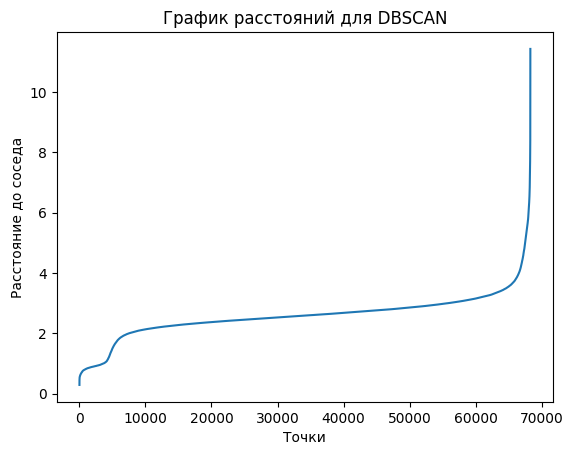

In [103]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)  # min_samples
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4])  # Берём 4-е расстояние (n_neighbors - 1)
plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Расстояние до соседа')
plt.title('График расстояний для DBSCAN')
plt.show()

In [3]:
a=6
a

6